In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

model_name = "PEDS_gauss_residual"

results = pd.read_csv(f"data/results/{model_name}/error_results.csv")
results


,pores,kappa_true,kappa_pred,error
0,[1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. ...,19.797934,18.819990,0.051963
1,[1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. ...,33.654545,35.005150,0.038583
2,[1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. ...,24.371400,24.419361,0.001964
3,[1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. ...,17.528261,17.810467,0.015845
4,[0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. ...,22.588207,22.530603,0.002557
...,...,...,...,...
1995,[0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. ...,17.059881,16.914692,0.008584
1996,[0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. ...,22.862280,22.975178,0.004914
1997,[1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. ...,20.244898,20.700802,0.022023
1998,[0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. ...,22.542358,21.727215,0.037517


In [ ]:
#results_peds = pd.read_csv(f"data/results/PEDS_gauss_residual/error_results.csv")

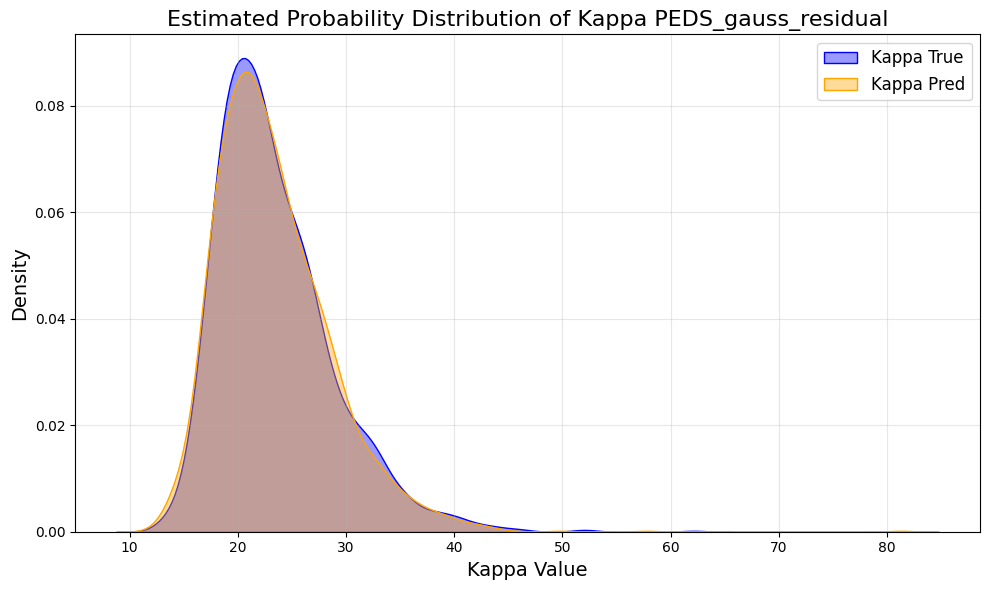

In [ ]:
# show estimated probability distribution of results['kappa_true'] (KDE) and same for results['kappa_pred'] on the same graph

# Plot KDE for 'kappa_true' and 'kappa_pred'
plt.figure(figsize=(10, 6))
sns.kdeplot(results['kappa_true'], label='Kappa True', color='blue', fill=True, alpha=0.4)
sns.kdeplot(results['kappa_pred'], label='Kappa Pred', color='orange', fill=True, alpha=0.4)

# Customize the plot
plt.title(f'Estimated Probability Distribution of Kappa {model_name}', fontsize=16)
plt.xlabel('Kappa Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig(f"figures/{model_name}/final_validation/prob_density_kappa.png")
plt.show()

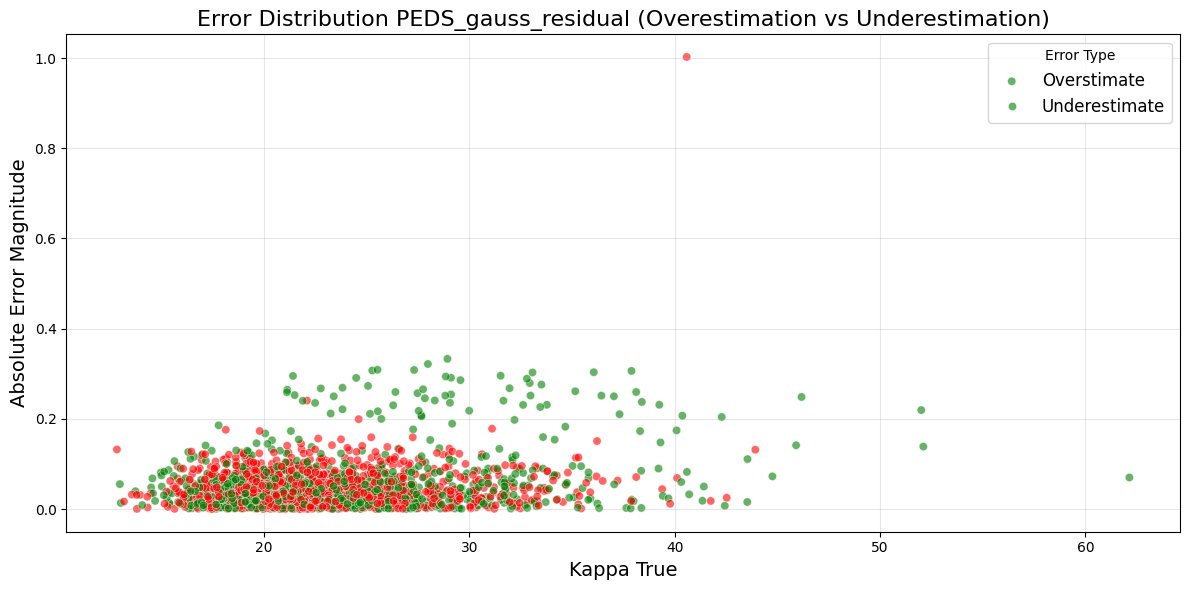

In [ ]:
# Compute overestimation and underestimation
results['error_type'] = results['kappa_pred'] > results['kappa_true']  # True if overestimated

# Scatter plot of error type
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=results,
    x='kappa_true',
    y=abs(results['kappa_pred'] - results['kappa_true'])/abs(results['kappa_true']),
    hue='error_type',
    palette={True: 'red', False: 'green'},
    alpha=0.6
)

# Customize the plot
plt.title(f'Error Distribution {model_name} (Overestimation vs Underestimation)', fontsize=16)
plt.xlabel('Kappa True', fontsize=14)
plt.ylabel('Absolute Error Magnitude', fontsize=14)
plt.legend(title='Error Type', labels=['Overstimate', 'Underestimate'], fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig(f"figures/{model_name}/final_validation/error_distribution.png")
plt.show()

/var/folders/vm/jbz26v712ml47jf017_wh1sr0000gn/T/ipykernel_7028/2493530167.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  error_stats = results.groupby('percentile_bin')['error'].mean().reset_index()
/var/folders/vm/jbz26v712ml47jf017_wh1sr0000gn/T/ipykernel_7028/2493530167.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=error_stats, x='percentile_bin', y='error', palette='Blues')


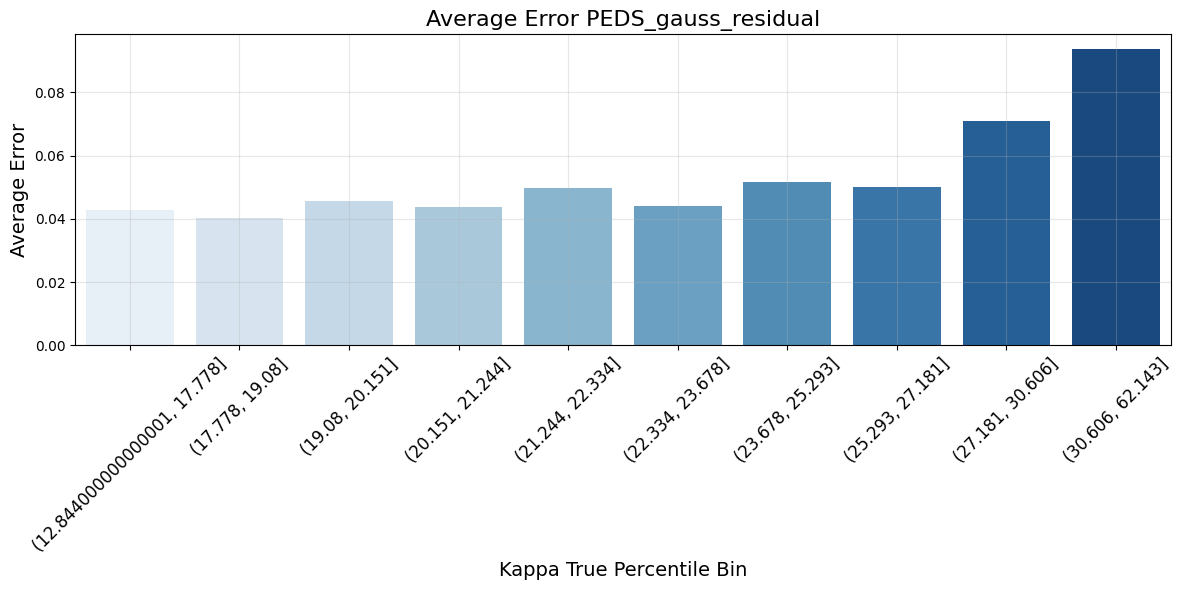

In [ ]:
# Create bins based on 0.1 percentiles of 'kappa_true'
results['percentile_bin'] = pd.qcut(results['kappa_true'], q=10, precision=3)

# Compute the average error for each bin
error_stats = results.groupby('percentile_bin')['error'].mean().reset_index()

# Plot the average error for each percentile bin
plt.figure(figsize=(12, 6))
sns.barplot(data=error_stats, x='percentile_bin', y='error', palette='Blues')

# Customize the plot
plt.title(f'Average Error {model_name}', fontsize=16)
plt.xlabel('Kappa True Percentile Bin', fontsize=14)
plt.ylabel('Average Error', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.savefig(f"figures/{model_name}/final_validation/binned_error_distribution.png")
plt.show()